Supervised Learning

- Regression : continuous numerical variable

- Classification : class/category 

##### Data Science Steps

`Business Understanding`

Health facility

 - What they do

Treat cancer patients 

`Problem`
Cancerous cells can either be benign or malignant. We want to be able to detect early if a cancer is malignant/benign.  


`Data Understanding`
Cancer dataset 

`Problem Framing`
Create a ML model that can predict if a cancer cell is malignant or begnin given the properties of the cell. -  Classification Problem 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('cancer dataset.csv', sep=';')

#### Data Profiling

In [3]:
df.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,4,1,1,1,2,3,1,1,1,begnin
1,1,5,8,6,5,8,7,10,1,malignant
2,3,2,2,3,2,1,1,1,1,begnin
3,3,1,1,3,8,1,5,8,1,begnin
4,10,4,6,1,2,10,5,3,1,malignant


In [5]:
df.shape

(300, 10)

There are 9 possible features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       300 non-null    int64 
 1   ucellsize   300 non-null    int64 
 2   ucellshape  300 non-null    int64 
 3   mgadhesion  300 non-null    int64 
 4   sepics      300 non-null    int64 
 5   bnuclei     300 non-null    int64 
 6   bchromatin  300 non-null    int64 
 7   normnucl    300 non-null    int64 
 8   mitoses     300 non-null    int64 
 9   classe      300 non-null    object
dtypes: int64(9), object(1)
memory usage: 23.6+ KB


In [4]:
df.describe()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,4.436667,3.053333,3.216667,2.653333,3.236667,3.470000,3.360000,2.860000,1.616667
std,2.820017,2.997851,3.008859,2.710037,2.205342,3.561561,2.404789,3.114386,1.800146
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


- All the feature variables/columns have a min and max value of 1 and 10 respectively

- All the features have similar descriptive characteristics

In [8]:
df['classe'].value_counts()

classe
begnin       199
malignant    101
Name: count, dtype: int64

- Class imbalance

`Problems we want to avoid in ML`

- overfitting: Model fits the training data perfectly such that it is not able to predict correctly on new data. High bias
- underfitting : Model is not learning from the data at all such that when you give the model new data, it is going to predict incorrectly.

`What we want`
- Sweet spot : Model is neither underfitting or overfitting.

##### Data Cleaning

In [6]:
df.isnull().sum()

clump         0
ucellsize     0
ucellshape    0
mgadhesion    0
sepics        0
bnuclei       0
bchromatin    0
normnucl      0
mitoses       0
classe        0
dtype: int64

In [7]:
df.duplicated().sum()

88

In [8]:
features = df.drop('classe', axis=1)

In [9]:
label = df['classe']

In [10]:
features

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses
0,4,1,1,1,2,3,1,1,1
1,1,5,8,6,5,8,7,10,1
2,3,2,2,3,2,1,1,1,1
3,3,1,1,3,8,1,5,8,1
4,10,4,6,1,2,10,5,3,1
...,...,...,...,...,...,...,...,...,...
295,4,1,1,1,2,1,3,1,1
296,5,1,1,4,2,1,3,1,1
297,5,1,1,1,2,1,2,1,1
298,5,7,9,8,6,10,8,10,1


In [11]:
label

0         begnin
1      malignant
2         begnin
3         begnin
4      malignant
         ...    
295       begnin
296       begnin
297       begnin
298    malignant
299       begnin
Name: classe, Length: 300, dtype: object

##### Feature Selection

<Figure size 1000x600 with 0 Axes>

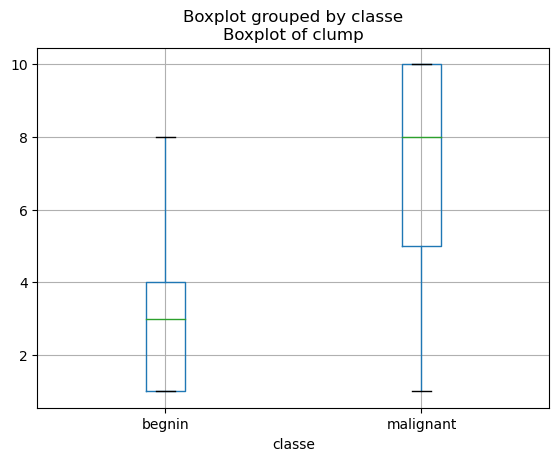

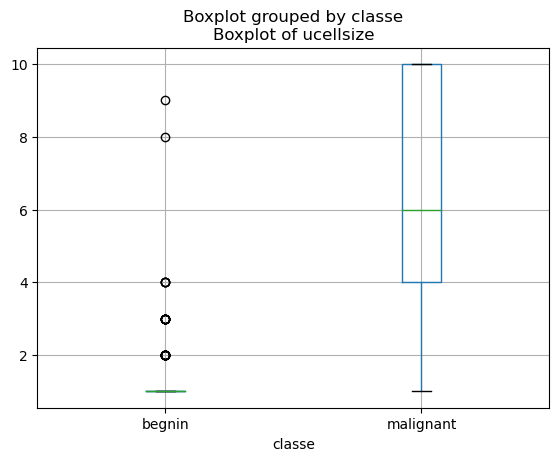

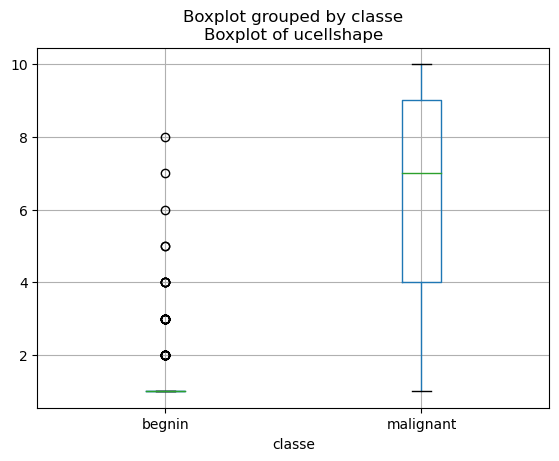

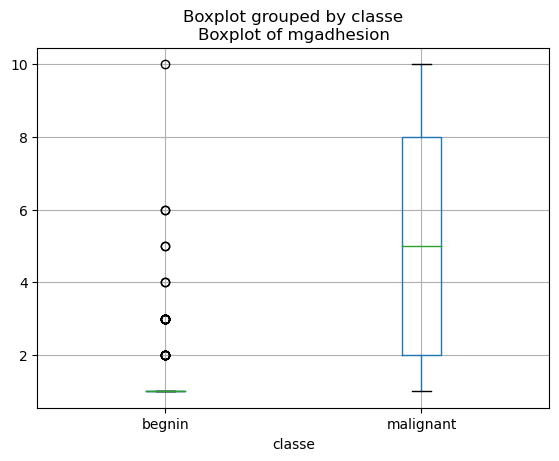

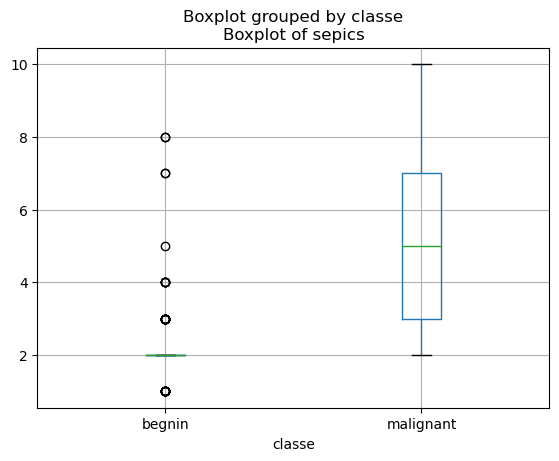

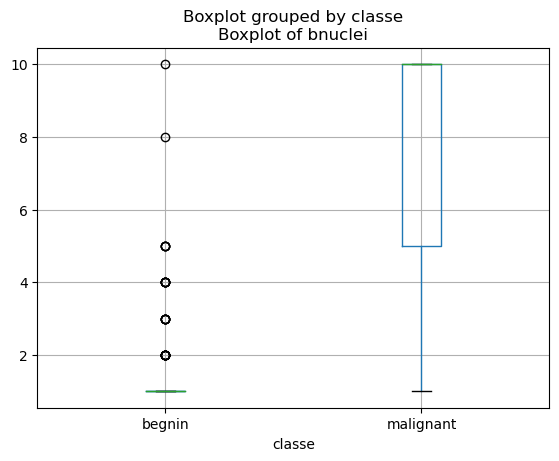

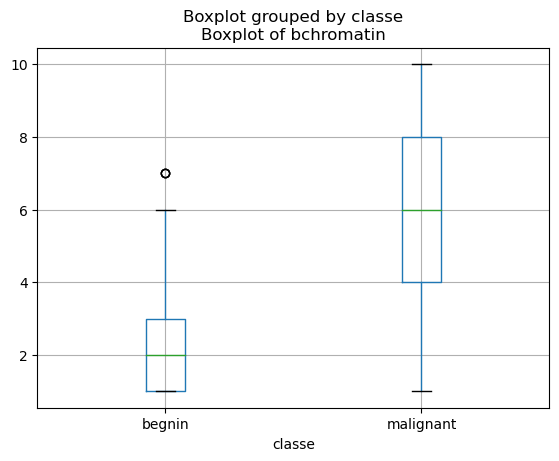

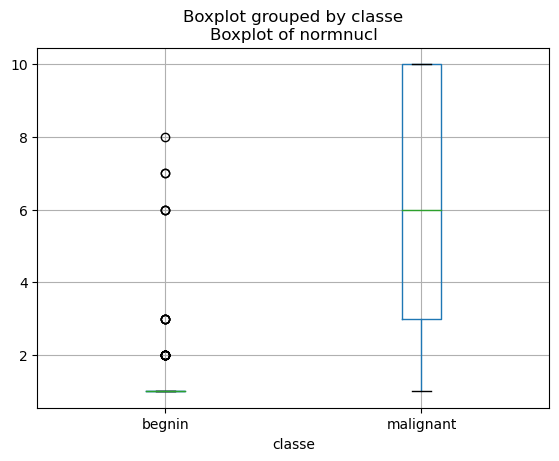

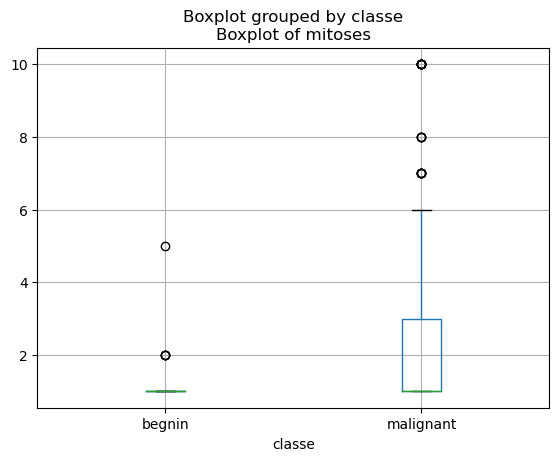

In [26]:
plt.figure(figsize=(10,6))

for col in features.columns:
    df.boxplot(column=col, by='classe')
    plt.title(f'Boxplot of {col}')
    plt.show()

 ucellshape, ucellsize, sepics, bnuclei, mitosis, normnuci show marked difference between the two classes and could good predictor/features

In [27]:
## correlation

features.corr()
x1, x2, x3 -> Y

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses
clump,1.000000,0.672937,0.675443,0.499073,0.532396,0.588211,0.501972,0.503556,0.415202
ucellsize,0.672937,1.000000,0.907127,0.661358,0.742732,0.654824,0.701556,0.669952,0.402295
ucellshape,0.675443,0.907127,1.000000,0.680672,0.729633,0.700169,0.676045,0.674589,0.435886
mgadhesion,0.499073,0.661358,0.680672,1.000000,0.601913,0.665254,0.626315,0.602095,0.441592
sepics,0.532396,0.742732,0.729633,0.601913,1.000000,0.590011,0.560909,0.681695,0.461004
bnuclei,0.588211,0.654824,0.700169,0.665254,0.590011,1.000000,0.638157,0.562859,0.361009
bchromatin,0.501972,0.701556,0.676045,0.626315,0.560909,0.638157,1.000000,0.584600,0.279211
normnucl,0.503556,0.669952,0.674589,0.602095,0.681695,0.562859,0.584600,1.000000,0.467041
mitoses,0.415202,0.402295,0.435886,0.441592,0.461004,0.361009,0.279211,0.467041,1.000000


correlation varies from -1 to 1

-1 : perfectly negatively
0 : No correlation
1 : perfectly positive

In [12]:
features.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses
0,4,1,1,1,2,3,1,1,1
1,1,5,8,6,5,8,7,10,1
2,3,2,2,3,2,1,1,1,1
3,3,1,1,3,8,1,5,8,1
4,10,4,6,1,2,10,5,3,1


In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=3)
X_selected = fs.fit_transform(features.values, label)

In [14]:
X_selected

array([[ 1,  1,  3],
       [ 5,  8,  8],
       [ 2,  2,  1],
       [ 1,  1,  1],
       [ 4,  6, 10],
       [ 5,  7,  7],
       [ 3,  3,  2],
       [10, 10,  8],
       [ 5,  6,  8],
       [ 3,  2, 10],
       [ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  5,  4],
       [ 1,  1,  1],
       [ 3,  4,  5],
       [ 1,  1,  1],
       [ 3,  5,  3],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 7, 10, 10],
       [ 1,  1,  1],
       [ 1,  1,  4],
       [ 1,  1,  1],
       [ 1,  2,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 6,  6, 10],
       [ 1,  1,  1],
       [ 5,  5, 10],
       [ 2,  3,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  2,  1],
       [ 7,  4,  3],
       [ 5,  7, 10],
       [ 3,  4,  2],
       [ 1,  1,  1],
       [ 8,  8,  4],
       [ 3,  4, 10],
       [ 1,  1,  1],
       [ 3,  2,  3],
       [ 2,  4, 10],
       [ 1,  3,  1],
       [ 1,  1,  1],
       [10,  9,  5],
       [ 3,  

In [15]:
cols_id = fs.get_support()
cols_id

array([False,  True,  True, False, False,  True, False, False, False])

In [16]:
X = features.iloc[:,cols_id]

In [17]:
X

,ucellsize,ucellshape,bnuclei
0,1,1,3
1,5,8,8
2,2,2,1
3,1,1,1
4,4,6,10
...,...,...,...
295,1,1,1
296,1,1,1
297,1,1,1
298,7,9,10


In [18]:
y = label

In [19]:
y

0         begnin
1      malignant
2         begnin
3         begnin
4      malignant
         ...    
295       begnin
296       begnin
297       begnin
298    malignant
299       begnin
Name: classe, Length: 300, dtype: object

### Encoding

In [20]:
df.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,4,1,1,1,2,3,1,1,1,begnin
1,1,5,8,6,5,8,7,10,1,malignant
2,3,2,2,3,2,1,1,1,1,begnin
3,3,1,1,3,8,1,5,8,1,begnin
4,10,4,6,1,2,10,5,3,1,malignant


In [21]:
df['classe'] = df['classe'].replace({'begnin': 0, 'malignant':1})

In [22]:
df.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,4,1,1,1,2,3,1,1,1,0
1,1,5,8,6,5,8,7,10,1,1
2,3,2,2,3,2,1,1,1,1,0
3,3,1,1,3,8,1,5,8,1,0
4,10,4,6,1,2,10,5,3,1,1


In [23]:
y = df['classe'].values

In [24]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], d

##### Split the dataset into training and test sets

In [25]:
df.shape

(300, 10)

In [27]:
X.values

array([[ 1,  1,  3],
       [ 5,  8,  8],
       [ 2,  2,  1],
       [ 1,  1,  1],
       [ 4,  6, 10],
       [ 5,  7,  7],
       [ 3,  3,  2],
       [10, 10,  8],
       [ 5,  6,  8],
       [ 3,  2, 10],
       [ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  5,  4],
       [ 1,  1,  1],
       [ 3,  4,  5],
       [ 1,  1,  1],
       [ 3,  5,  3],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 7, 10, 10],
       [ 1,  1,  1],
       [ 1,  1,  4],
       [ 1,  1,  1],
       [ 1,  2,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 6,  6, 10],
       [ 1,  1,  1],
       [ 5,  5, 10],
       [ 2,  3,  1],
       [ 1,  1,  1],
       [ 1,  1,  1],
       [ 1,  2,  1],
       [ 7,  4,  3],
       [ 5,  7, 10],
       [ 3,  4,  2],
       [ 1,  1,  1],
       [ 8,  8,  4],
       [ 3,  4, 10],
       [ 1,  1,  1],
       [ 3,  2,  3],
       [ 2,  4, 10],
       [ 1,  3,  1],
       [ 1,  1,  1],
       [10,  9,  5],
       [ 3,  

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y,test_size=0.3,random_state=0)

Algorithms for classification : Binary or multimonial

- Logistic regression

- Decision tree

- Random forest

- KNN

#### Training the model

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train) # train the model

In [30]:
model

LogisticRegression()

#### Model evaluation

In [35]:
df[['ucellsize', 'ucellshape', 'bnuclei', 'classe']]

,ucellsize,ucellshape,bnuclei,classe
0,1,1,3,0
1,5,8,8,1
2,2,2,1,0
3,1,1,1,0
4,4,6,10,1
...,...,...,...,...
295,1,1,1,0
296,1,1,1,0
297,1,1,1,0
298,7,9,10,1


In [36]:
predictions = model.predict(X_test)

In [38]:
# compare the predictions against the X_test using evaluation metrics

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

In [39]:
accuracy

0.9666666666666667

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        56
           1       1.00      0.91      0.95        34

    accuracy                           0.97        90
   macro avg       0.97      0.96      0.96        90
weighted avg       0.97      0.97      0.97        90



In [41]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['prediction'])

confusion_matrix

prediction,0,1
Actual,,
0,56,0
1,3,31


<Axes: xlabel='prediction', ylabel='Actual'>

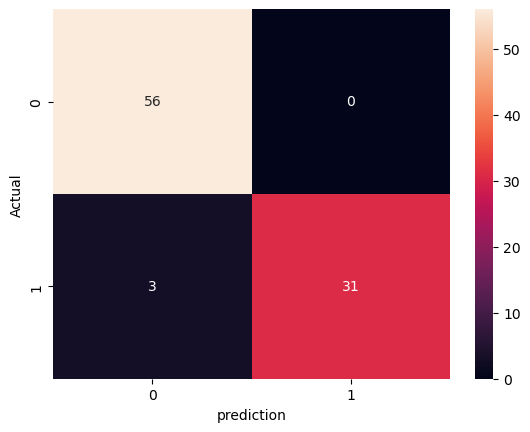

In [42]:
sb.heatmap(confusion_matrix, annot=True)

#### KNN - K Nearest Neighbours

In [47]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
predictions_knn = model_knn.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.97      0.97      0.97        34

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



<Axes: xlabel='prediction', ylabel='Actual'>

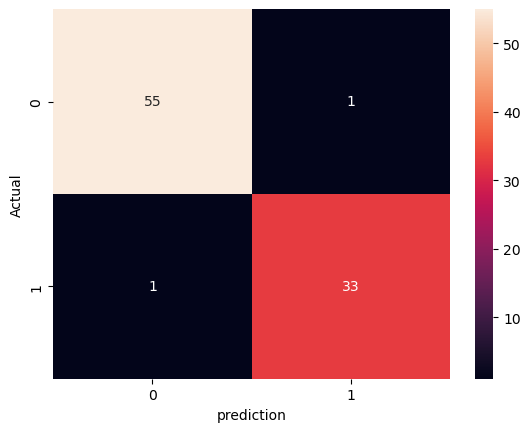

In [50]:
confusion_matrix = pd.crosstab(y_test, predictions_knn, rownames=['Actual'], colnames=['prediction'])

sb.heatmap(confusion_matrix, annot=True)

In [51]:
accuracy = accuracy_score(y_test, predictions_knn)

In [52]:
accuracy

0.9777777777777777

##### Model Persistence

In [53]:
import joblib

joblib.dump(model_knn, 'cancer_model_knn.joblib')

['cancer_model_knn.joblib']